In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import sys
import os
from scipy.optimize import curve_fit
font = {'family' : 'normal',
        'size'   : 25}

plt.rc('font', **font)

In [2]:
def clamp(a):
    try:
        c = np.copy(a)
        for i,e in enumerate(a):
            if e > 0:
                c[i] = a[i] 
            else:
                c[i] = 0
        return c
    except:
        if a > 0:
            return a
        else:
            return 0

def poli(x,a,b,c,d,e,f,g,h,i,j,k,l,m):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6 + h*x**7 + i*x**8 + j*x**9 + k*x**10 + l*x**11 + m*x**12

def fit_func(x,a,b,c):
    return a*(1-x/b)**c

In [3]:
for name in os.listdir("Daten"):
    plt.figure(figsize=(30,10))
    file = open("Daten/"+name)
    lines = file.readlines()
    xv,yv = [],[]
    for line in lines:
        vals = line[:-1].split("\t")
        xv.append(float(vals[0])) 
        yv.append(-float(vals[1]))

    popt,_ = curve_fit(fit_func,xv[:3288],yv[:3288],p0=[6.5,55,0.5])
    print(popt)
    plt.plot(xv,[fit_func(x,*popt) for x in xv],color="red",label="fit (1)",linewidth=3,linestyle="-.")
    #popt,_ = curve_fit(poli,xv,yv)
    #plt.plot(xv,[poli(x,*popt) for x in xv],color="orange",label="fit (2)",linewidth=3,linestyle="-.")
    #for x in xv:
    #    if poli(x,*popt) < 0:
    #        print(x)
    #        break
    #plt.plot(xv,[fit_func(x,1.5,56) for x in xv])
    #plt.ylim(0,6)

    plt.plot(xv,yv,marker=".",label="Messdaten")
    plt.xlabel("Temp [°C]")
    plt.ylabel("M-Feld [A/m]")
    plt.legend()
    file.close()
    plt.grid(True)
    file.close()
plt.savefig("..\..\Images\Teil3.png")

<ipython-input-2-7cd24c119486>:20: RuntimeWarning: invalid value encountered in double_scalars
  return a*(1-x/b)**c
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


In [5]:
x_ys0 = [x for i,x in enumerate(xv) if yv[i] < 0]

In [6]:
min(x_ys0)

55.1403147

In [7]:
nx = []
dy = []
for i in range(len(xv)):
    try:
        dy.append((yv[i]-yv[i+1])/(xv[i]-xv[i+1]))
        nx.append((xv[i]+xv[i+1])/2)
    except:
        pass

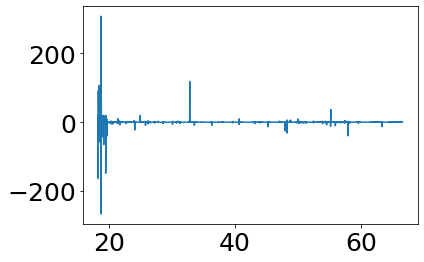

In [8]:
plt.plot(nx,dy)